# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [70]:
-- Query a variable:
-- SELECT * FROM df
--
-- Query a CSV file:
-- SELECT * FROM 'data.csv'
SELECT * FROM 'product_sales.csv';

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NA,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NA,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.9,2,27,New Jersey


In [71]:
import pandas as pd
import numpy as np
import seaborn as sns

product_sales['sales_method'] = product_sales['sales_method'].astype('category')
product_sales['state'] = product_sales['state'].astype('category')
product_sales['customer_id'] = product_sales['customer_id'].astype('string')

product_sales['sales_method'] = product_sales['sales_method'].str.lower()
product_sales['sales_method'].replace('em + call', 'email + call', inplace = True)

product_sales['revenue'] = pd.to_numeric(product_sales['revenue'], errors = 'coerce')
product_sales['revenue'].fillna(product_sales['revenue'].median(), inplace = True)

product_sales = product_sales[product_sales['years_as_customer'] <= 40]

In [72]:
product_sales.shape

(14998, 8)

# Data Validation

First, I'd like to apologize for any mistakes present in this report as english isn't my first language.

Now, the first step in any Data Analysis project is to verify our data. We need to check for each column if its data type corresponds to what we would expect it to be, if there are any missing or abnormal values and potentially if there are any outliers in our data, meaning values that are outside the overall values of our data. 


For our first task, I checked the type of every columns in our data. Almost all of our numeric variables (week, nb_sold, years_as_customer, nb_site_visits) were treated as integers, which is good. The column 'revenue' was the only one which was not an integer, and it was due to the fact that it contained values which were not numbers ('NA'). Our categorical variables on the other hand were classified as objects, I changed 'sales_method' and 'state' as category variables and 'customer_id' to a simple string.

Once we have checked the type of our data, we can look for any missing or abnormal values in each column. For a first glance, we can check each unique values present in every column, this works particularly well for columns with a finite number of values like 'customer_id'. Since we already knew the columns 'week', 'nb_sold', 'years_as_customer' and 'nb_site_visits' were of type integer, there are only numbers in these columns which makes sense. I also checked that there were no negative values in either columns. There didn't seem to be any abnormal values in all these columns except for 'years_as_customer'. We learned that the company was founded in 1984, so a company could have been a client for at most 40 years but there were two lines with abnormal values (higher than 40), so I removed them. We can now move on to other columns.

We know there are only three different sales methods, so I was expecting to find only three unique values in the 'sales_method' columns but I found five. There was a duplicate value with 'Email' and 'email'. I solved that problem by changing every character in that column to lower cases. The last abnormal value was 'em + call', which seemed to be another spelling for the 'email + call' method, so I replaced 'em + call' with 'email + call' in order to have the same spelling for each methods. Next was to check the 'state' column, and I found fifty different states which makes sense. The column 'customer_id' had no missing value, and it seemed to correspond to what we were expecting, so there was no need to modify anything in it.

Finally, as I said before the 'revenue' column contained 'NA' values. We had multiple options to clean this data, we could remove from our dataset every line which had 'NA' for revenue, or we could replace each 'NA' value by the mean or median for example. Considering the fact that there are over a thousand lines with the value 'NA', I chose to replace the value rather than delete it. And I decided to replace it with the median rather than the mean because the mean of our revenue was too different from its median, which could imply that our data is skewed (mean was 93.9 whereas median was 89.5). After this was done, the revenue type was automatically changed to float.


The last step in our data validation was to check for any outliers in our data. Since our analysis is focused on revenue generated, I checked for outliers in the 'revenue' column. Meaning revenue that is outside of the general revenue and I found 1031 outliers. To help me better see the effect of outliers in the data, I decided to plot two histograms, one with the full dataset (on the left) and the other without outliers (on the right).

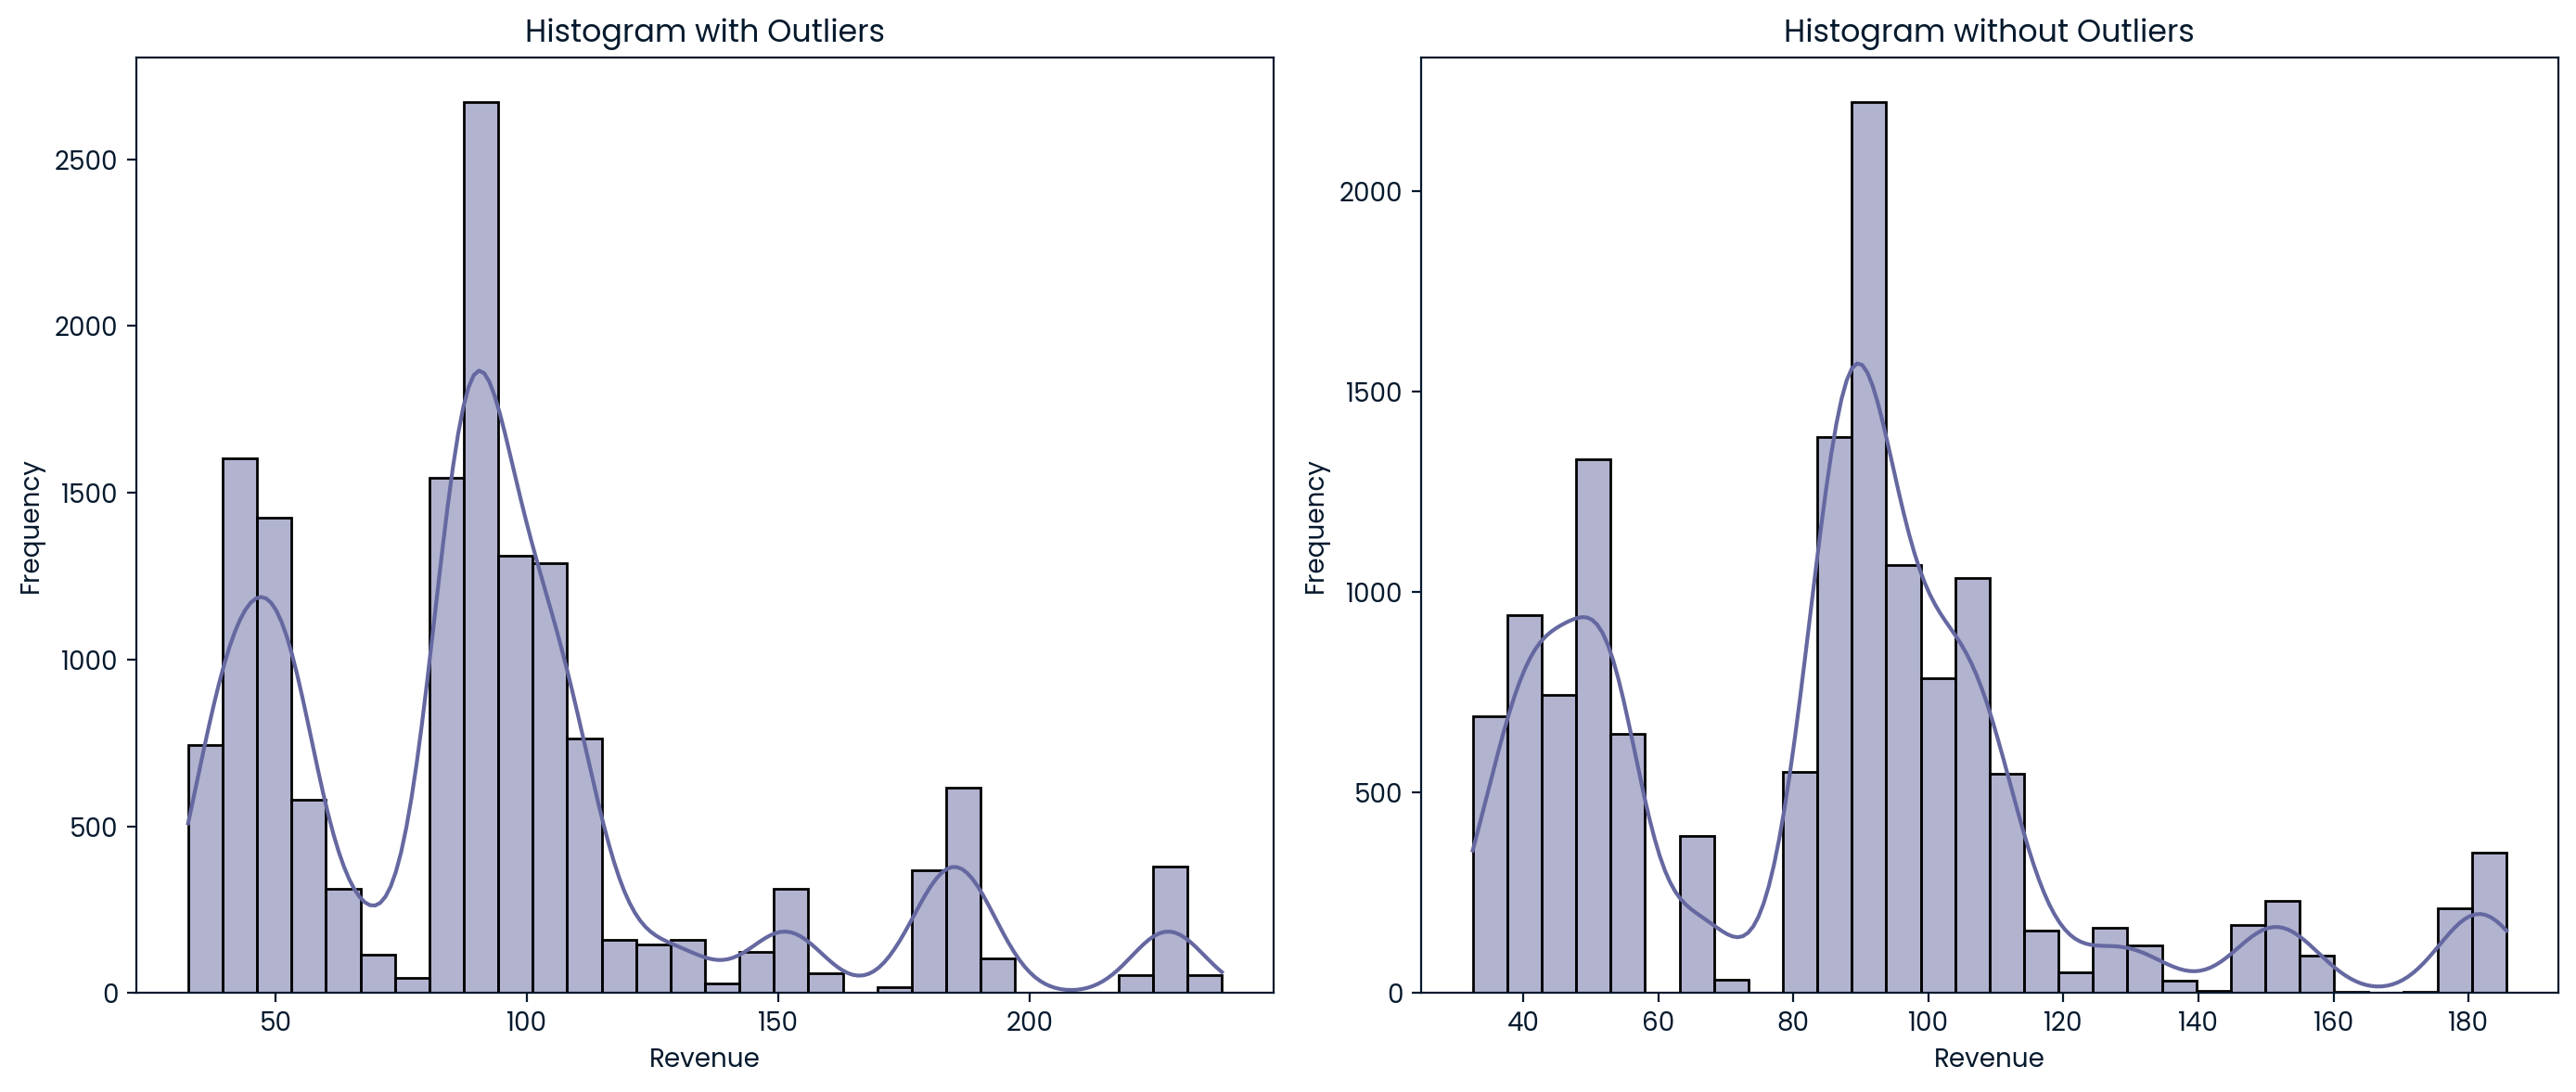

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

df_with_outliers = product_sales.copy()
df_without_outliers = product_sales.copy()
Q1 = product_sales['revenue'].quantile(0.25)
Q3 = product_sales['revenue'].quantile(0.75)
IQR = Q3 - Q1
outliers = product_sales[(product_sales['revenue'] < (Q1 - 1.5 * IQR)) | (product_sales['revenue'] > (Q3 + 1.5 * IQR))]
df_without_outliers.drop(outliers.index, inplace=True)

# Plot histogram with outliers
sns.histplot(df_with_outliers['revenue'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Histogram with Outliers')
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('Frequency')

# Plot histogram without outliers
sns.histplot(df_without_outliers['revenue'], bins=30, ax=axes[1], kde=True)
axes[1].set_title('Histogram without Outliers')
axes[1].set_xlabel('Revenue')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

We can see on the graphic without outliers that the biggest peak is more centered, meaning that central values are more representative of our data. We can see the outliers are skewing the distribution. Nonetheless, these outliers can represent important information, for example if all those high revenue values are associated with one specific method or a specific week or any combination thereof, it could tell us that one is outperforming the others. That's why, I have to decided to use the full dataset, with its outliers.

With this, all of our data has been cleaned and validated. In the end, our dataframe started with 15 000 lines of data, and after cleaning we ended up with 14 998 lines. We can now move on to the next step.

# Exploratory Analysis

## How many customers were there for each approach?

To better understand the distribution of customers through our different sales methods, I decided to use a pie chart to visualize the data. It represents the proportion of customers for each approach.

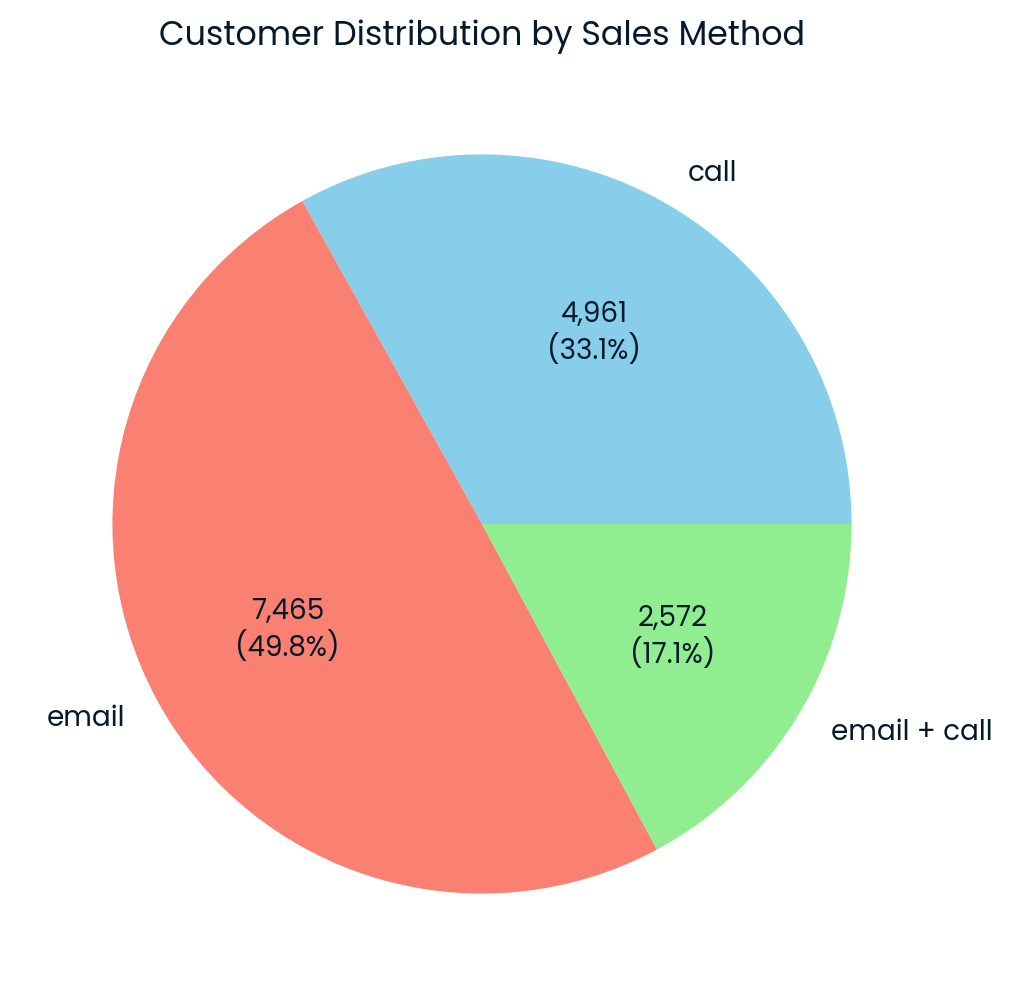

In [74]:
import matplotlib.pyplot as plt

def func(pct, allvals):
    absolute = int(round(pct / 100. * sum(allvals)))
    return f'{absolute:,}\n({pct:.1f}%)'

customers_method = product_sales.groupby('sales_method')['customer_id'].count()
data = customers_method.reset_index()
data.columns = ['sales_method', 'customer_count']

labels = data['sales_method']
sizes = data['customer_count']
colors = ['skyblue', 'salmon', 'lightgreen']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct=lambda pct: func(pct, sizes))
plt.title('Customer Distribution by Sales Method')
plt.show()

We can see that almost half of our customers were contacted by email, while about a third received a phone call and the rest received an email and a call.

## What does the spread of the revenue look like overall? And for each method?

In order to get an overview of the range of our revenue, I used an histogram to represent the frequency of different revenues. It is important to remember that we are viewing the data with its outliers.

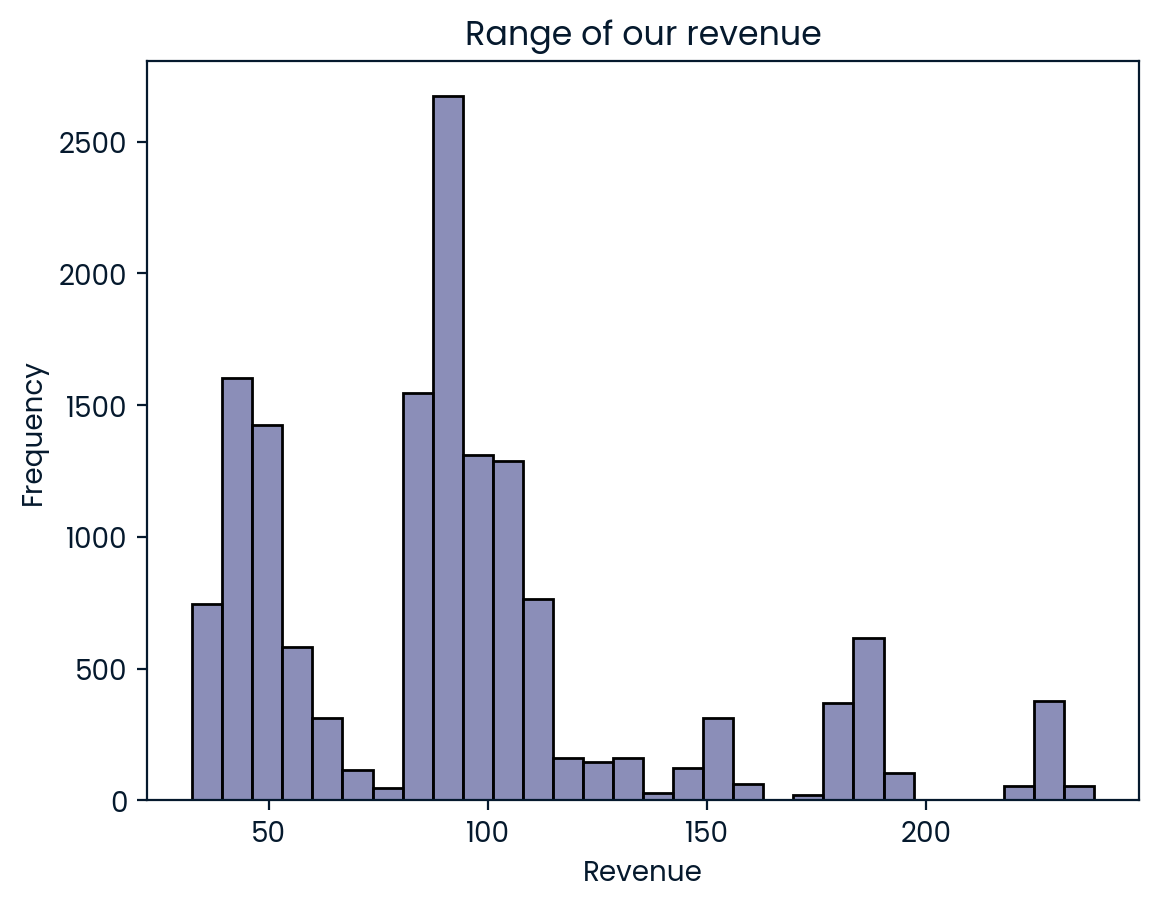

In [75]:
plt.figure()
sns.histplot(product_sales['revenue'], bins=30)
plt.title('Range of our revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

We can observe that most of our revenues are either between 20 and 60, or between 80 and 120 with the biggest peak around 90. We can also observe some smaller peaks towards the high-end range of our revenue. But overall, our revenue is mostly clustered around those two intervals. Another good approach, is to look at a boxplot of our revenue, since it will show more statistics about our data.

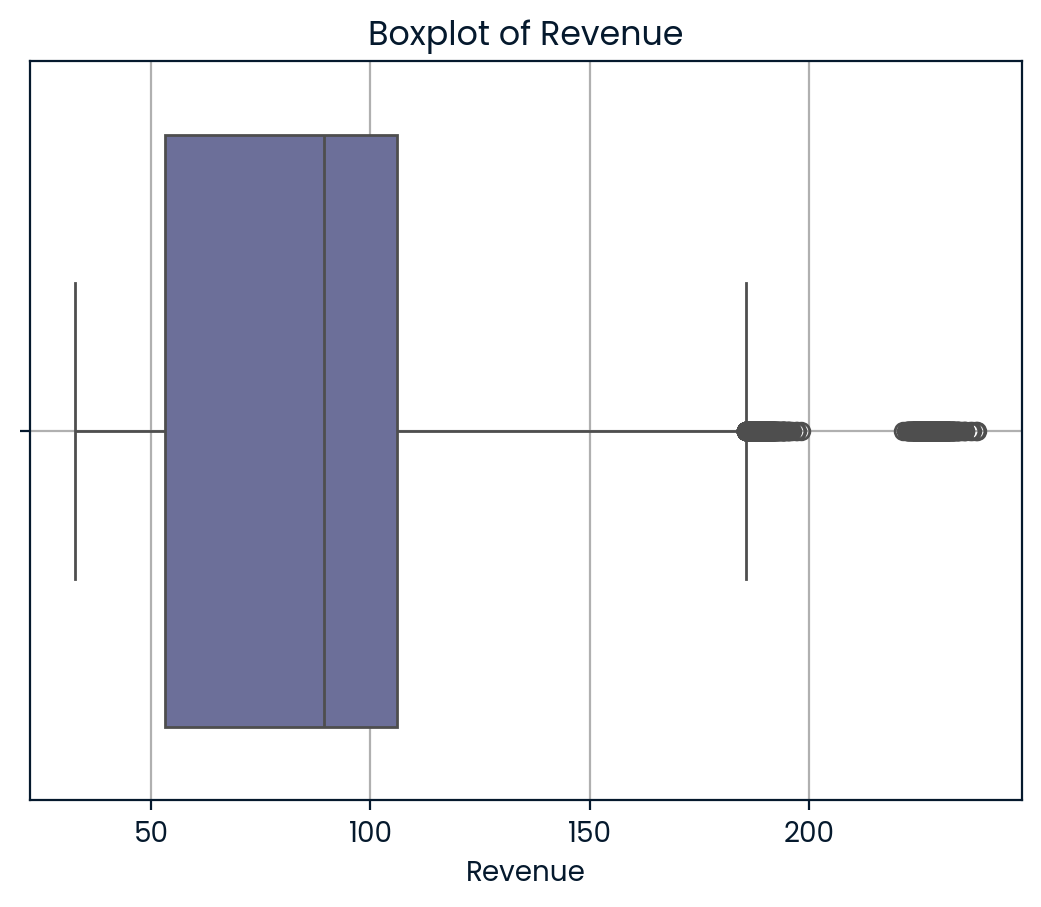

In [76]:
plt.figure()
sns.boxplot(x=product_sales['revenue'])
plt.title('Boxplot of Revenue')
plt.xlabel('Revenue')
plt.grid()
plt.show()

The box of our boxplot represents 50% of our data. The left side of the box represents the first quartile, meaning that 25% of our data is under its value, while the right side represents the third quartile, meaning that 75% of our data is under its value, and the line in the box represents the median, which is the value that stands at the middle of our data. This way, we have a better view of the spread of our revenue. 50% of our revenue (the box) is between 55 and 110 (approximate value). Due to the fact that we have outliers in our data, which are high values, our second quartile is closer to the minimum than the third quartile is to the maximum. 

Now that we know what the overall spead of our revenue looks like, we can check the revenue spread for each method. If each of our methods is equivalent in revenue, their boxplot should resemble the one just above.

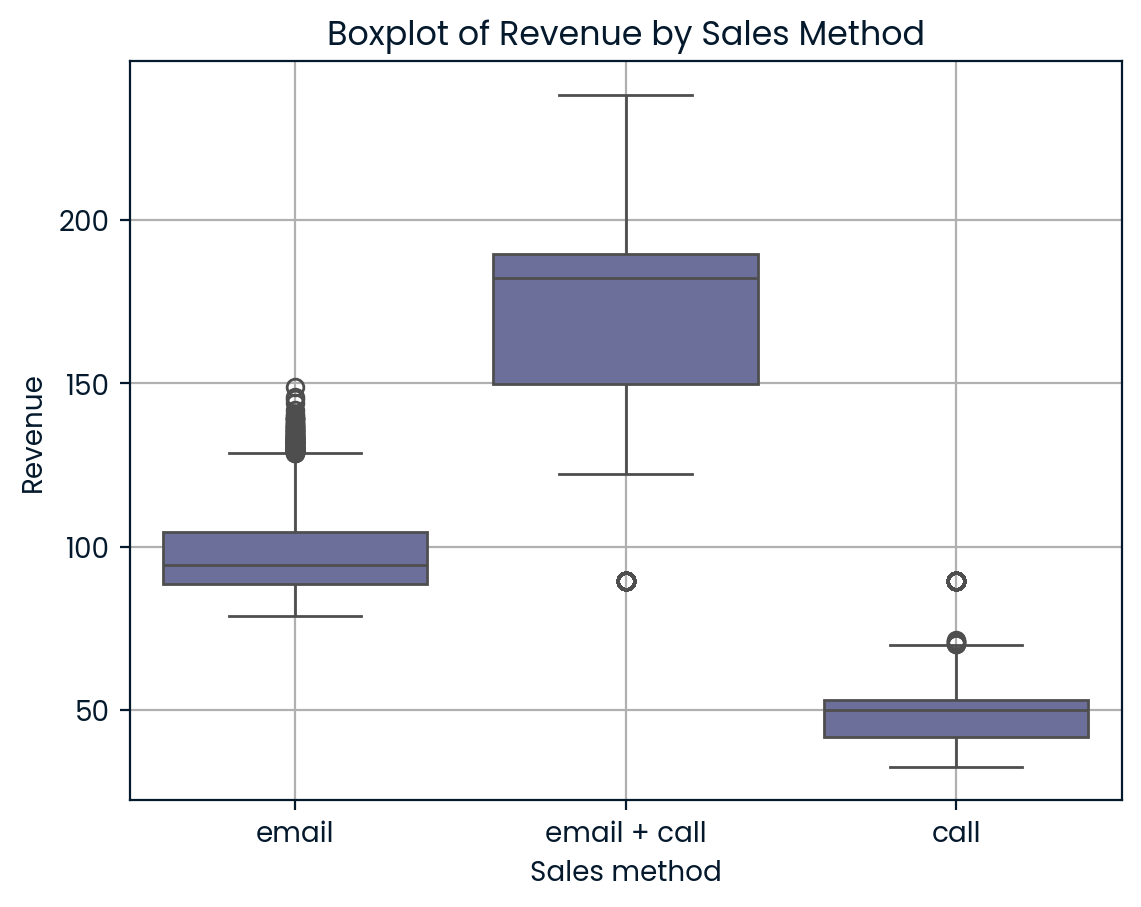

In [77]:
plt.figure()
sns.boxplot(x='sales_method', y='revenue', data=product_sales)
plt.title('Boxplot of Revenue by Sales Method')
plt.xlabel('Sales method')
plt.ylabel('Revenue')
plt.grid()
plt.show()

We can see that each method has a completely different boxplot, meaning that each method has a different spread of revenue. We can observe that 'email + call' has the biggest spread, with an interquartile range of about 40 between 150 and 190. It seems to be the most effective method has it has the highest revenues, spreading between 125 and 240. The least effective method seems to be 'call', it has the smallest spread which spans from 20 to 75 with a median revenue of 50, compared to the median revenue of 180 for the 'email + call' method. The 'email' method is in the middle, with a median revenue of 90 and an interquartile range of 20 (between 85 and 105). 

We can easily see that the revenue spread of each method vastly differs from the overall revenue spread, meaning that each method brings different results, with the 'email + call' method seemingly bringing the highest revenue. But before concluding, we can go further into our analysis.

## Was there any difference in revenue over time for each of the methods?

Now, we are going to take a look to see if the week has an influence over sales for any of our methods. To do this, I chose to use a line plot to represent the evolution of the average revenue of each week for each method.

[]

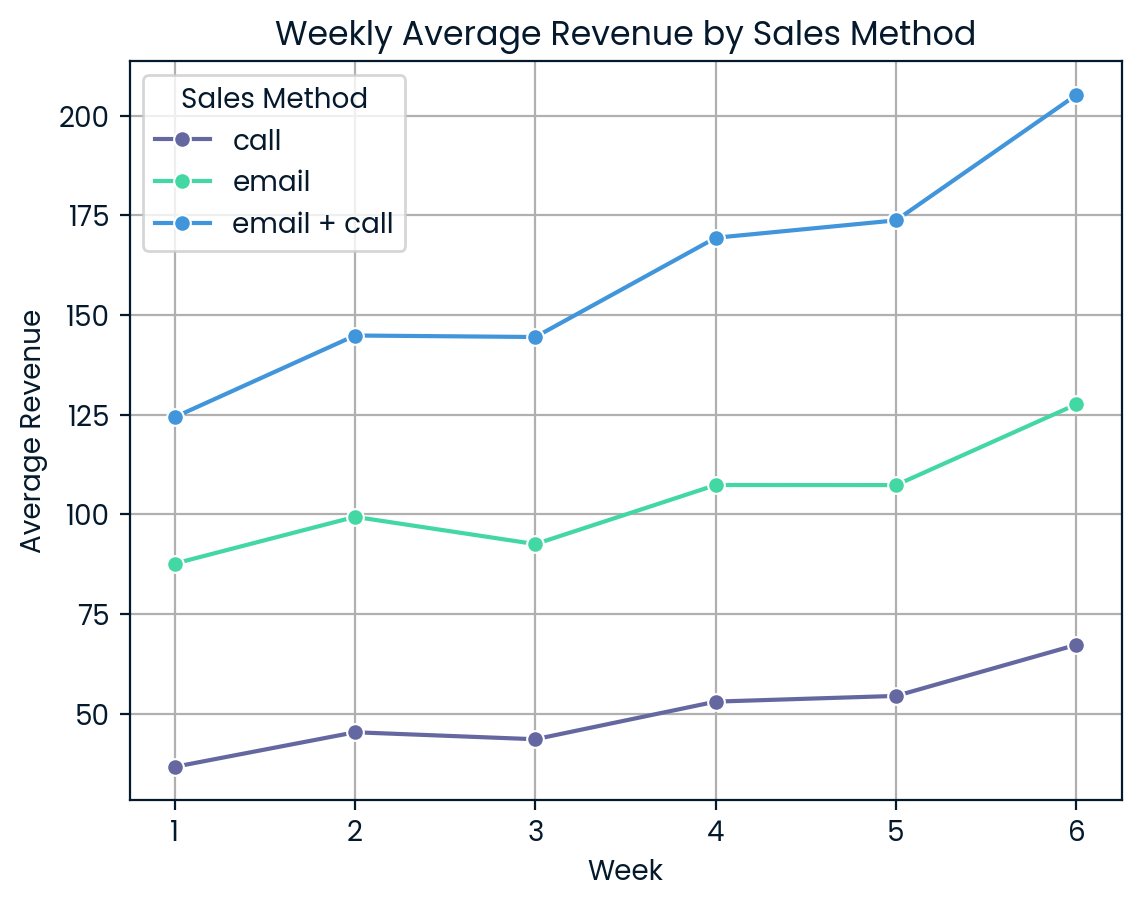

In [78]:
weekly_revenue = product_sales.groupby(['week', 'sales_method'])['revenue'].mean().reset_index()

plt.figure()
sns.lineplot(data=weekly_revenue, x='week', y='revenue', hue='sales_method', marker='o')
plt.title('Weekly Average Revenue by Sales Method')
plt.xlabel('Week')
plt.ylabel('Average Revenue')
plt.legend(title='Sales Method')
plt.grid()
plt.plot()

We can see that each line for each method follows a similar pattern, with slightly bigger increase or decrease each time. We can also observe that there is no overlapping, the 'email + call' is consistently better than the 'email' method, which in turn is consistently better than the 'call' method. There is no method that outperforms another method on a specific week. 

This analysis follows our previous assumption, the 'email + call' method generates more revenue than the others. Before concluding which method is the best, I wanted to take a look to see if the clients had an impact on revenue.

# Does an older customer brings in more revenue than a newer customer?

In order to know if there is an impact on revenue depending on the client longevity with our company, I compared the number of years a client has been buying from us with the average revenue they generate. I also distinuished those values for each of our methods.

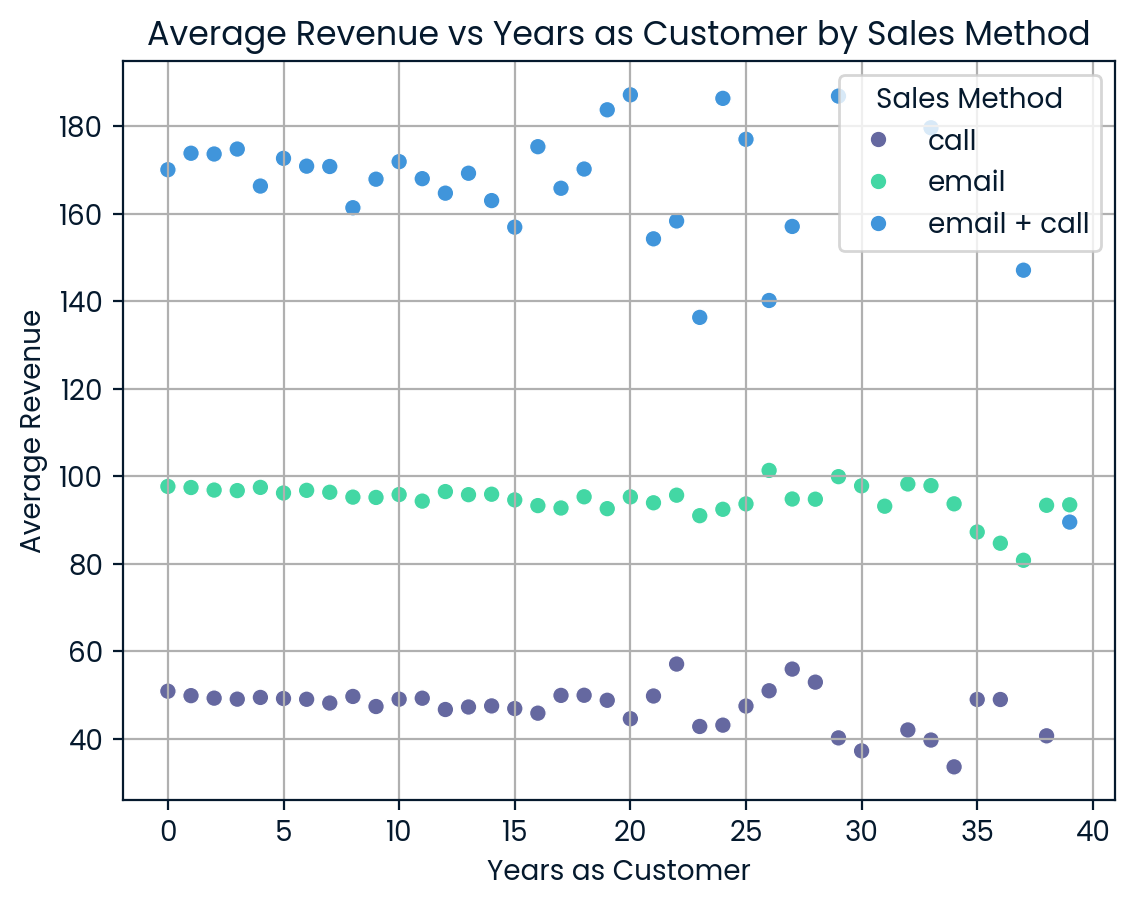

In [79]:
avg_customer = product_sales.groupby(['years_as_customer', 'sales_method'])['revenue'].mean().reset_index()
plt.figure()
sns.scatterplot(data=avg_customer, x='years_as_customer', y='revenue', hue='sales_method')
plt.title('Average Revenue vs Years as Customer by Sales Method')
plt.xlabel('Years as Customer')
plt.ylabel('Average Revenue')
plt.legend(title='Sales Method')
plt.grid()
plt.show()

We can see that the average revenue is pretty similar no matter the number of years a client has been a customer, except for the 'email + call' method where there is a bigger variance when a client has been with us for 15+ years. Even with this bigger variance, the 'email + call' method remains the highest method in terms of average revenue. It doesn't seem any clients respond better or worse to a specific method.

Overall, there doesn't seem to be any impact on revenue compared to the numbers of years a client has been buying from us.

# Metric to use for monitoring

My recommendation of a metric to use in order to monitor the business performances would be: a weekly average revenue by sales method. 

Using this metric, you can easily check the performances of each of our sales method, and see if one performs better or worse than the other. Which would allow you to keep track of which method brings in more revenue, and to adjust your sales tactics according to those results.

Given our current data, the last week we have was the 6th and it had an average of:

    - call: 67.3,
    - email: 127.6,
    - email + call: 205.2.
    
And if we take a look at the first week, we had the following averages:

    - call: 36.6,
    - email: 87.6,
    - email + call: 124.4.
    
By comparing with each week you can also see at which speed the average revenue increases or decreases, and it can help you make better decisions regarding marketing strategies.

# Conclusion

Throughout our analysis, we could see that the 'email + call' methods has always outperformed the others in terms of revenue. It seems logic to only use this method of marketing in the future, but we also have to take into account the time needed to complete each method.

The 'call' method is longest one to complete, and it brings the lowest average revenue, so we can conclude that we should stop using this method altogether.
The 'email' method is the fastest, with the 'email + call' method being the second fastest, so we need to choose between those two methods.
Given the fact that the 'email + call' methods only takes 10 minutes to complete, compared to the 30 minutes of the 'call' method, and the fact that this method consistently outperforms the 'email' method by a big margin, I would recommend fully switching to the 'email + call' method and giving up on the others, or only using 'email' if the sales team is extremely busy and doesn't have enough time to use other methods.

There are two other facts to take into account. First, our methods don't show better performance on specific weeks and they also don't show better performance on a specific type of customer. Second, we have a bigger samples for the 'email' method than for the 'email + call' method, but the interquartile range of our 'email' method is rather small, meaning that most revenue it generates is around the same value (its median which is around 90) so we can assume the future values of this method will be similar to the ones we have. Compared to the median of the 'email + call' method, it is pretty low. 

Therefore it makes sense to fully and only use the most effective method, even if it takes a bit more time to put in place, the revenue generated by it makes it worth it.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation